In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

%matplotlib inline

In [7]:
os.listdir('../database/fit/')

['variation_dist_ecv_1.csv',
 'variation_alpha_1.csv',
 'variation_dist_dcr3_1.csv',
 'variation_dist_dcr1_1.csv',
 'variation_alpha_-1.csv',
 'variation_dvz_1.csv',
 'variation_dist_dcr3_-1.csv',
 'sector_4_sin.csv',
 'variation_dist_dcr1_-1.csv',
 'sector_5_sin.csv',
 'variation_dist_ec_edep_1.csv',
 'variation_dist_ecu_1.csv',
 'sector_systematics.csv',
 'variation_dist_ecsf_1.csv',
 'variation_dist_ecu_-1.csv',
 'variation_dist_vz_1.csv',
 'variation_dist_ecw_1.csv',
 'variation_dist_cc_-1.csv',
 'sector_6_sin.csv',
 'variation_dvz_-1.csv',
 'variation_dist_ecw_-1.csv',
 'sector_3_sin.csv',
 'variation_p_mes_0.csv',
 'README.md',
 'sector_3.csv',
 'bootstrap_est_sector_1.csv',
 'sector_2.csv',
 'variation_missing_mass_-1.csv',
 'variation_p_mes_1.csv',
 'bootstrap_est_sector_2.csv',
 'monte_carlo.csv',
 'bootstrap_est_sector_3.csv',
 'sector_1.csv',
 'sector_5.csv',
 'bootstrap_est_sector_6.csv',
 'sector_4.csv',
 'sector_2_sin.csv',
 'sector_6.csv',
 'bootstrap_est_sector_4.csv',


In [8]:
data = pd.read_csv('../database/fit/bootstrap_est_sector_1.csv')

In [12]:
par1 = data['bootstraps_0'].iloc[0]
par2 = data['bootstraps_1'].iloc[0]
par3 = data['bootstraps_2'].iloc[0]

In [18]:
for s in par1.strip().split():
    if s not in ["[", "]"]:
        print(s)

0.03124897
0.02829139
0.00833879
0.02242729
0.01501301
0.01809298
0.03393473
0.0080097
0.00661319
0.01104078
0.03147077
0.02143242
0.03431795
0.02044981
0.01964931
-0.00378475
0.01346118
0.01385243
0.01688687
0.01033595
0.02792692
0.00536962
0.00813814
0.01344624
0.02000818
0.01427216
0.02023809
-0.00503068
0.00078091
0.01585325
0.00315732
0.01642055
0.0152594
0.01729316
0.01887265
0.03538287
0.02165372
0.0090565
0.01297844
0.04110297
0.00048542
0.01359142
0.01549584
0.01431051
0.01449492
0.02004068
0.0197526
0.0028431
0.01100055
0.02339589
0.0398907
0.01860212
0.03234788
0.01164184
0.00179718
0.01260454
0.02787996
0.02192549
-0.00638913
0.02325573
0.00899978
0.03012937
-0.0056832
0.00542809
0.00059595
0.00862254
0.05718854
0.01726761
0.01733471
0.01827978
-0.00070579
0.00163621
0.03615141
0.0084118
0.01548893
0.01049489
0.02353233
0.01303757
0.0195606
0.01454599
0.00463471
0.03595762
0.02784053
0.00180832
0.01650795
0.01684558
0.01742146
0.04251536
0.03143543
-0.01065428
-0.00060391
0

In [28]:
def clean_array(x):
    """ Remove the bad stuff. """
    forbidden_chars = ['[',']','{','}']
    
    clean = [] 
    for s in x.strip().split():
        
        cleaned_string = []
        if s not in forbidden_chars:        
            clean.append(s.strip(']'))
        
    clean = [float(s) for s in clean]
    return np.array(clean)
            

In [30]:
par1 = clean_array(par1)
par2 = clean_array(par2)
par3 = clean_array(par3)

(-1, 1)

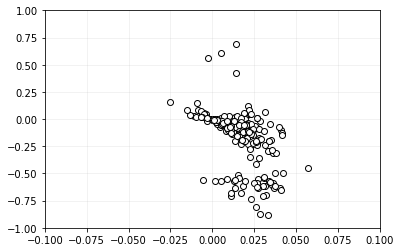

In [37]:
plt.scatter(par1, par2, edgecolor='k', color='w', marker='o')
plt.grid(alpha=0.2)
plt.xlim([-0.1, 0.1])
plt.ylim([-1, 1])

(-1, 1)

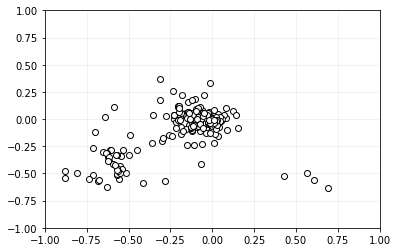

In [38]:
plt.scatter(par2, par3, edgecolor='k', color='w', marker='o')
plt.grid(alpha=0.2)
plt.xlim([-1, 1])
plt.ylim([-1, 1])

In [40]:
pars = np.empty(shape=(len(par1),3))

In [41]:
pars[:,0] = par1
pars[:,1] = par2
pars[:,2] = par3

In [58]:
mu_matrix = np.zeros(shape=(len(par1),3))
mu_matrix[:,0] = pars.mean(axis=1)
mu_matrix[:,1] = pars.mean(axis=1)
mu_matrix[:,2] = pars.mean(axis=1)

In [65]:
np.matmul((pars - mu_matrix).transpose(),(pars - mu_matrix))         

array([[ 5.90322831, -4.71541097, -1.18781735],
       [-4.71541097,  6.47559602, -1.76018505],
       [-1.18781735, -1.76018505,  2.9480024 ]])